In [5]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import glob
import pandas as pd


In [6]:
# 画像を読み込み、グレースケールに変換
image_path = '../data/sample7.jpg'
image = Image.open(image_path).convert('L')

# 画像をnumpy配列に変換
image_array = np.array(image)

# ピクセル値は黒0、白255

In [7]:
# 画像サイズの確認
image_array.shape

(886, 610)

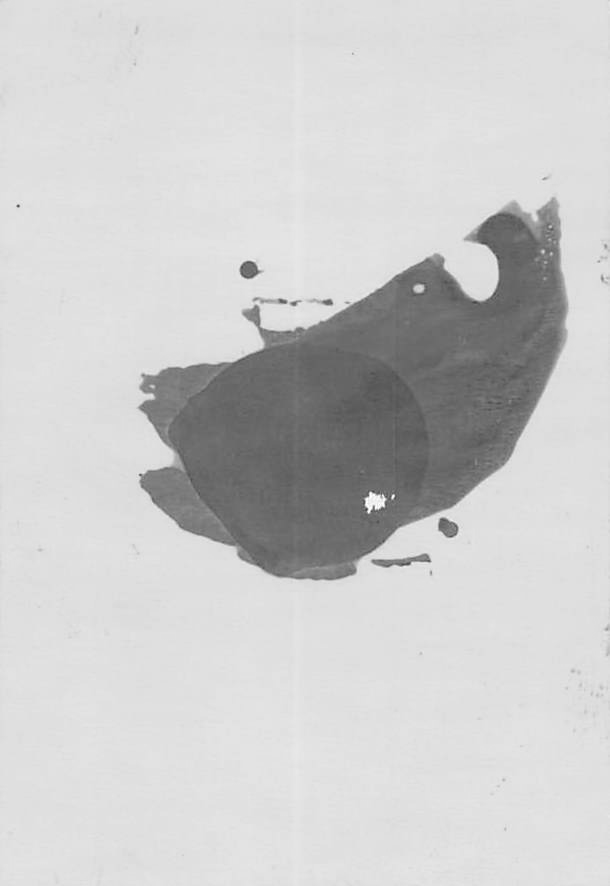

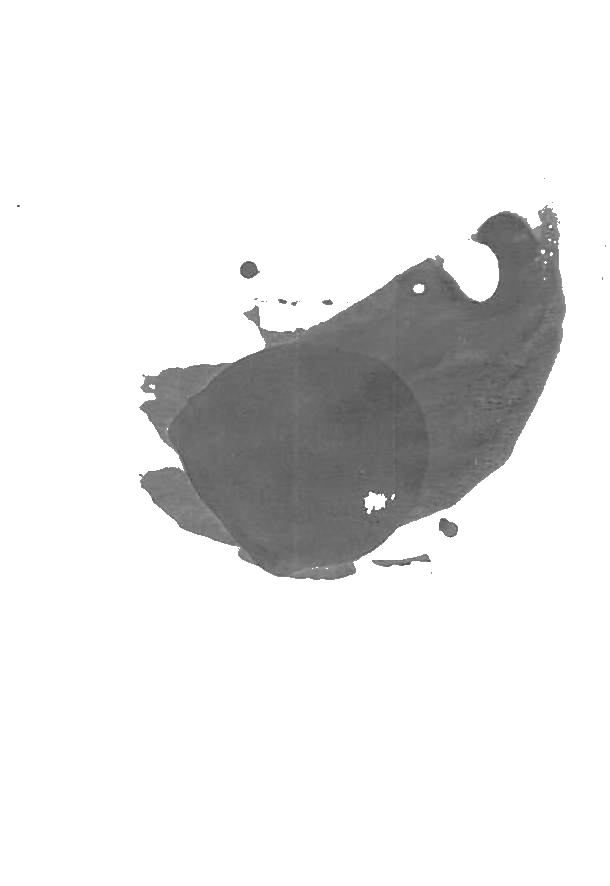

In [8]:
# しきい値を設定
threshold =150

# 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
threshold_image_array = np.where(image_array <= threshold, image_array, 255)

# numpy配列を画像に戻す
threshold_image = Image.fromarray(threshold_image_array)

# 画像を表示
image.show()
threshold_image.show()

In [9]:


# しきい値よりも濃い（暗い）ピクセルの数をカウント
dark_pixels = np.sum(image_array <= threshold)

# 全体のピクセル数を取得
total_pixels = image_array.size

# 濃いピクセルの割合を計算
dark_pixel_ratio = dark_pixels / total_pixels

print(f'濃いピクセルの割合: {dark_pixel_ratio:.2%}')

濃いピクセルの割合: 16.63%


In [10]:
# 各ピクセル値の出現数をカウント
pixel_counts = np.bincount(image_array.flatten(), minlength=256)

# 結果を表示
for value, count in enumerate(pixel_counts):
    # ピクセル値0は除外
    if count != 0:
        print(f'ピクセル値 {value}: {count}個')

ピクセル値 61: 1個
ピクセル値 67: 1個
ピクセル値 69: 2個
ピクセル値 74: 1個
ピクセル値 76: 3個
ピクセル値 77: 3個
ピクセル値 78: 3個
ピクセル値 79: 3個
ピクセル値 80: 8個
ピクセル値 81: 5個
ピクセル値 82: 12個
ピクセル値 83: 9個
ピクセル値 84: 18個
ピクセル値 85: 16個
ピクセル値 86: 21個
ピクセル値 87: 34個
ピクセル値 88: 101個
ピクセル値 89: 159個
ピクセル値 90: 270個
ピクセル値 91: 340個
ピクセル値 92: 462個
ピクセル値 93: 568個
ピクセル値 94: 701個
ピクセル値 95: 858個
ピクセル値 96: 906個
ピクセル値 97: 1043個
ピクセル値 98: 1328個
ピクセル値 99: 2006個
ピクセル値 100: 2672個
ピクセル値 101: 3916個
ピクセル値 102: 4584個
ピクセル値 103: 5144個
ピクセル値 104: 5113個
ピクセル値 105: 5909個
ピクセル値 106: 5814個
ピクセル値 107: 6471個
ピクセル値 108: 5405個
ピクセル値 109: 5296個
ピクセル値 110: 4093個
ピクセル値 111: 3008個
ピクセル値 112: 2399個
ピクセル値 113: 1978個
ピクセル値 114: 1540個
ピクセル値 115: 1200個
ピクセル値 116: 979個
ピクセル値 117: 891個
ピクセル値 118: 824個
ピクセル値 119: 879個
ピクセル値 120: 890個
ピクセル値 121: 936個
ピクセル値 122: 992個
ピクセル値 123: 1047個
ピクセル値 124: 991個
ピクセル値 125: 938個
ピクセル値 126: 827個
ピクセル値 127: 749個
ピクセル値 128: 629個
ピクセル値 129: 559個
ピクセル値 130: 515個
ピクセル値 131: 491個
ピクセル値 132: 382個
ピクセル値 133: 303個
ピクセル値 134: 300個
ピクセル値 135: 271個
ピクセル値 136: 

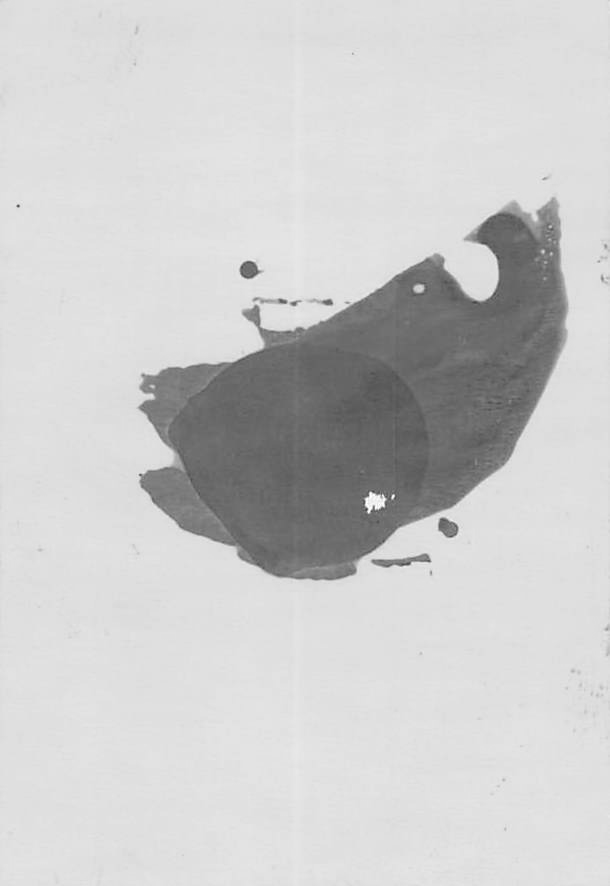

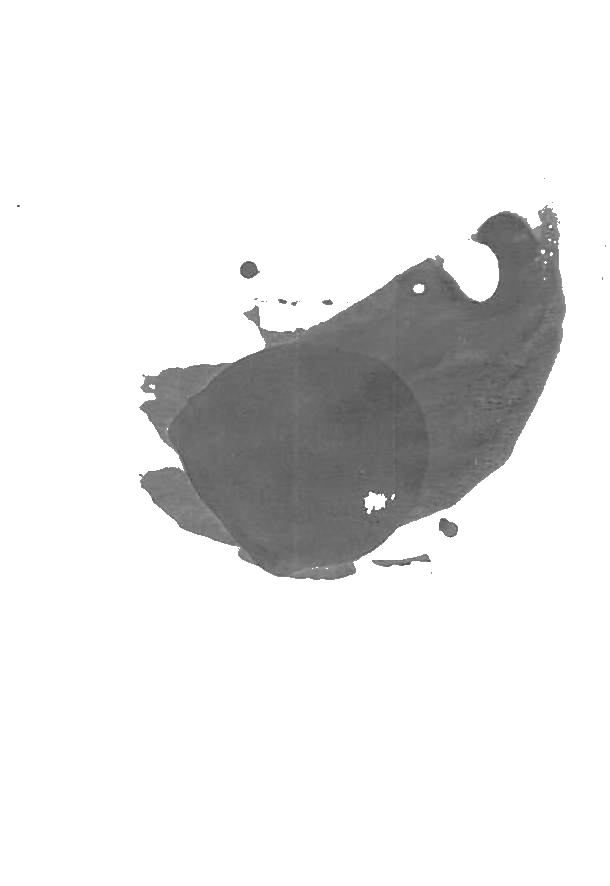

In [11]:
threshold_image = Image.fromarray(threshold_image_array)

# 画像を表示
image.show()
threshold_image.show()

In [12]:
# 加工した画像にテキストを入れ込み保存

# ImageDrawオブジェクトを作成
draw = ImageDraw.Draw(threshold_image)

# フォントの設定（システムのデフォルトフォントを使用）
font = ImageFont.load_default()

# フォントサイズを指定します（例: 40）
# font = ImageFont.truetype("arial", 40) 

# テキストを追加する位置（x, y）を指定
position = (50, 50)

# 描画するテキスト
text = "Hello, World!"

# テキストの色（黒）
text_color = 0  

# 画像にテキストを描画
draw.text(position, text, fill=text_color, font=font)


output_path = '../data/new_sample3.jpeg'  # 保存するファイルのパスを指定してください
threshold_image.save(output_path)

In [13]:
output_path = '../data/new_sample3.jpeg'
image.save(output_path)

In [14]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
files = glob.glob(f'{directory_path}/*.jpg')

# ファイルリストを表示
print(files)

['../data/sample6.jpg', '../data/sample2.jpg', '../data/sample4.jpg', '../data/sample7.jpg', '../data/sample3.jpg', '../data/sample5.jpg', '../data/sample1.jpg']


In [15]:
path = '../data/imageinfo.csv'
df = pd.read_csv(path)
df

,name,value
0,img1,NaN
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


In [20]:
df['value'].iloc[0]= dark_pixel_ratio
df

/tmp/ipykernel_2168/2660744495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'].iloc[0]= dark_pixel_ratio


,name,value
0,img1,0.166321
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


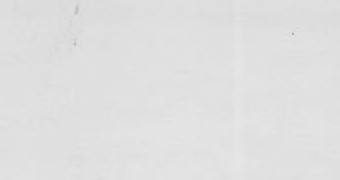

In [21]:
im_crop = image.crop((60, 20, 400, 200))
im_crop